In [5]:
import espressomd
import numpy as np
import espressomd.electrostatics
import espressomd.electrostatic_extensions
from espressomd.interactions import *
import espressomd.visualization
import espressomd.observables
import espressomd.accumulators
from scipy import integrate
from tqdm import tqdm


import matplotlib.pyplot as plt



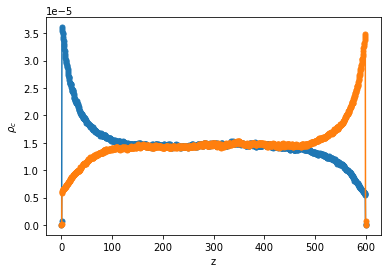

In [6]:

q = np.array([1.0, 2.0, 3.0])
prefactor=2.0
p_factor=4.0*np.pi*prefactor

Pot_applied=np.linspace(0, 10.0, 10 )
prefactor=2.0
#Pot_applied=[]
#Pot_applied.append((10.0/9.0)*4.0)
for i in range(1):
    read_charge_dens = np.loadtxt('chh_V4_lt_cation_profile_N50.dat')
    read_cation = np.loadtxt('chh_V4_lt_anion_profile_N50.dat')
    read_anion = np.loadtxt('chh_V4_lt_anion_profile_N50.dat')
    read_anion_1 = np.loadtxt('chh_V4_lt_cation_profile_N50.dat')
    
    #plt.plot(read_charge_dens[:,0], read_charge_dens[:,1], marker='o', markersize=5)
    #plt.plot(read_cation[:,0], read_cation[:,1], marker='o', markersize=5)
    plt.plot(read_anion[:,0], read_anion[:,1], marker='o', markersize=5)
    plt.plot(read_anion_1[:,0], read_anion_1[:,1], marker='o', markersize=5)
    plt.ylabel(r'$\rho_c$')
    plt.xlabel('z')
   # plt.xscale("log")
plt.show()


0.027311481270696027
0.25


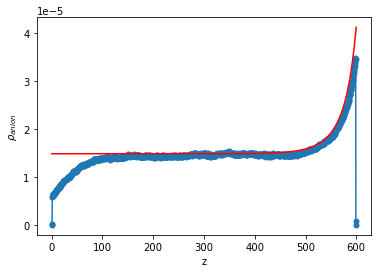

In [12]:
#np.savetxt("density_N20_V4_st_cation.txt", np.column_stack([zs,cation_profile_mean]), fmt='%.7f\t%.7f\t', delimiter='\t'  )
#np.savetxt("density_N20_V4_st_cation.txt", np.column_stack([zs,anion_profile_mean]), fmt='%.7f\t%.7f\t', delimiter='\t'  )
#***********************************************************
#             ANALYTICAL PB SOLUTION
#             ----------------------
#             Gouy Chapmann Density and potential profile 
#         for an (1:1) electrolyte in contact with a charged surface
#****************************************************************
nplus_z=[]
nminus_z=[]
potential_at_z=[]
n_ionpairs=200
p_factor=4.0*np.pi*prefactor
box_l_x = 150#116#150
box_l_y = 150#116#150
box_l_z = 599#499#599
Volume =box_l_x *box_l_y *box_l_z
kappa = np.sqrt( p_factor* ( (n_ionpairs/Volume) + (n_ionpairs/Volume)) ) 
print(kappa)
surface_potential = -1.0 #*************Important !!
print(-surface_potential/4.0)
gamma_factor = np.tanh(-surface_potential/4.0)
#gamma_factor_1 = np.tanh(0/4.0)
for z in read_anion_1[:,0]:
    
    boltz_factor = np.exp(-kappa*(box_l_z-z))
    numerator = (1+ (gamma_factor*boltz_factor ))
    denominator = (1- (gamma_factor*boltz_factor ))
    fac1 = (numerator /denominator )**2.0
    #boltz_factor_1 = np.exp(-kappa*(zs[z]))
    nplus_func_of_z = (n_ionpairs/Volume)* fac1
    #nplus_func_of_z = (1/mu**3.0 * (1+))
    nplus_z.append(nplus_func_of_z)
    pot_func_of_z = -2.0*np.log(numerator/denominator)
    potential_at_z.append(pot_func_of_z)
    
  #  nminus_func_of_z = (n_ionpairs/Volume)* ((1+ (gamma_factor_1*boltz_factor_1 )) / (1- (gamma_factor_1*boltz_factor_1 )))**2.0
  #  nminus_z.append(nminus_func_of_z)
    
plt.ylabel(r'$\rho_{anion}$')
plt.xlabel('z')

plt.plot(read_anion_1[:,0], read_anion_1[:,1], marker='o', markersize=5)
plt.plot(read_anion_1[:,0],nplus_z  ,color='red', markersize=5, label="Z+" )

-0.00102145 <-----------------


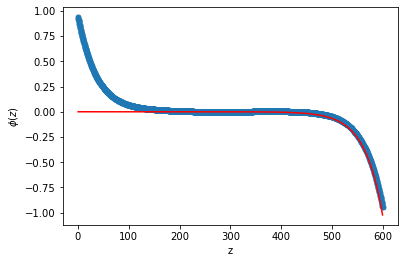

In [14]:
#Pot_applied=np.linspace(0, 10.0, 10 )
#print(Pot_applied)

for i in range(1):
    
    read_charge_dens = np.loadtxt('chh_V4_lt_cation_profile_N50.dat')
    read_cation = np.loadtxt('chh_V4_lt_cation_profile_N50.dat')
    read_anion = np.loadtxt('chh_V4_lt_anion_profile_N50.dat')

    Potential_z=[]
    Potential_z_const=[]
    Potential_z_rel=[]
    p_factor=4.0*np.pi*prefactor
    rho_IL_z=[]
    
    charge_density=[]
    rho_z=[]
    for z in range (int(len(read_cation)/2)):
        
        charge_density.append((q[0]*read_cation[z,1]+(-q[0]*read_anion[z, 1])))
        rho_z.append(read_cation[z,0])
        
    sigma = integrate.trapezoid(charge_density, rho_z)
    print(sigma, "<-----------------")
        
        
    for z in range (len(read_cation)):
        z_arr=[]
        rho=[]
        for k1 in range(0, z+1):
            z_arr.append(read_cation[k1,0])
            rho.append((q[0]*read_cation[k1][1])+(-q[0]*read_anion[k1][1]))
        
        rho_IL_z.append(integrate.trapezoid((rho), z_arr))
    #plt.plot(read_cation[:,0], rho_IL_z, marker='o', markersize=5)
    
    for z in range (len(read_cation)):
        z_arr=[]
        rho=[]
        for k1 in range(0, z+1):
            z_arr.append(read_cation[k1,0])
            rho.append(rho_IL_z[k1])
            
    
            
    
        rho_IL_z_double= -p_factor* integrate.trapezoid((rho), z_arr)
        rho_const = 0#(p_factor* read_cation[z,0]*sigma)#-(p_factor* box_l_z*sigma) 
        #print(p_factor,  read_cation[z,0], sigma , box_l_z )
        Potential_z.append( rho_IL_z_double + rho_const  )
        
    for z in range (len(read_cation)):
        mid = int(len(Potential_z)/2)
        Potential_z_rel.append(Potential_z[z] - Potential_z[mid])
        
    #print(Potential_z)
        #Potential_z_const.append(rho_IL_z)
        
#print(I1)
#    if(i>3.5 and i<4.5):
    plt.plot(read_cation[:,0],Potential_z_rel, marker='o', markersize=5)
    plt.plot(read_anion_1[:,0], potential_at_z  ,color='red', markersize=5, label="Z+" )
#plt.plot(zs,Potential_z_const)
    plt.xlabel('z')
    plt.ylabel(r'$\phi(z)$')
#plt.xscale("log")
#plt.legend()
    plt.show()


In [ ]:
%matplotlib widget

In [ ]:

for i in range(1):
    
    read_charge_dens = np.loadtxt('1_lt_charge_density_profile_N10.dat')
    read_cation = np.loadtxt('1_lt_cation_profile_N10.dat')
    read_anion = np.loadtxt('1_lt_anion_profile_N10.dat')
    
    charge_density = q[0]*read_cation[:, 1] - q[0]*read_anion[:, 1]
    integrated_charge_density = integrate.cumulative_trapezoid(y=charge_density, x=read_cation[:, 0], initial=0.0)
    integrated_charge_density_2 = integrate.cumulative_trapezoid(y=integrated_charge_density, x=read_cation[:, 0], initial=0.0)
    
    integrated_charge_density_2 *= -4 * np.pi * prefactor
    
    missing_offset = (i - integrated_charge_density_2[-1])
    surface_charge = missing_offset / read_cation[-1, 0] / (-4 * np.pi * prefactor)
    
    print(i, "surface charge:", surface_charge)
    
    
#     another_expression = integrate.cumulative_trapezoid(y=charge_density*(-read_anion[:, 0]), x=read_anion[:, 0], initial=0.0)
#     another_expression += integrate.cumulative_trapezoid(y=charge_density, x=read_anion[:, 0], initial=0.0) * read_anion[:, 0]
#     another_expression *= -4 * np.pi * prefactor

    #plt.plot(read_cation[:,0], integrated_charge_density_2, marker='o', markersize=5)
#     plt.plot(read_cation[:,0], another_expression, marker='x', markersize=5)

    
#plt.xlabel('z')
#plt.ylabel(r'$\phi(z)$')
#plt.xscale("log")
#plt.legend()
#plt.show()


In [ ]:
for i in Pot_applied:
    read_charge_dens = np.loadtxt('lt_charge_density_profile_'+str(i)+'.dat')
    read_cation = np.loadtxt('lt_cation_profile_'+str(i)+'.dat')
    read_anion = np.loadtxt('lt_anion_profile_'+str(i)+'.dat')
    plt.plot(read_charge_dens[:,0], read_charge_dens[:,1], marker='o', markersize=5)
plt.show()